In [8]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4667dfea-c881-42f8-8aaa-eedaa5d8bba4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-09-03T14:21:56.979Z', 'error_code': 0, 'error_message': None, 'elapsed': 49, 'credit_count': 1, 'notice': None, 'total_count': 9546}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12330, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [9]:
import pandas as pd
pd.set_option('display.max.columns',None)
pd.set_option('display.max.rows',None)

In [10]:
df = pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12330,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.991536e+07,1.991536e+07,False,NaN,1,NaN,NaN,None,2025-09-03T14:20:00.000Z,111473.290106,6.626376e+10,-6.1067,-0.000230,0.212806,-0.308938,-3.290810,2.993488,7.197172,2.220031e+12,57.6868,2.340939e+12,None,2025-09-03T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
1,1027,Ethereum,ETH,ethereum,10504,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207054e+08,1.207054e+08,True,NaN,2,NaN,NaN,None,2025-09-03T14:19:00.000Z,4436.860465,3.730756e+10,1.6198,1.057704,1.706825,-3.995148,21.229780,76.204698,72.647043,5.355530e+11,13.9207,5.355530e+11,None,2025-09-03T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
2,52,XRP,XRP,xrp,1695,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.948226e+10,9.998582e+10,False,NaN,3,NaN,NaN,None,2025-09-03T14:20:00.000Z,2.859183,6.128975e+09,-10.7439,0.149541,1.155997,-5.067023,-6.815293,28.583207,30.581806,1.700707e+11,4.4192,2.859183e+11,None,2025-09-03T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
3,825,Tether USDt,USDT,tether,145081,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.681425e+11,1.727330e+11,True,NaN,4,NaN,NaN,None,2025-09-03T14:19:00.000Z,1.000495,1.130845e+11,-7.4796,0.049083,0.049879,0.027438,0.050041,0.018066,0.034376,1.682258e+11,4.3654,1.728185e+11,None,2025-09-03T14:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-09-03 10:24:05.972422
4,1839,BNB,BNB,bnb,2699,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.391877e+08,1.391877e+08,False,NaN,5,NaN,NaN,None,2025-09-03T14:20:00.000Z,857.895034,1.928947e+09,-25.2296,0.383075,0.933772,-0.294859,12.166772,30.966064,30.278607,1.194084e+11,3.1032,1.194084e+11,None,2025-09-03T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
5,5426,Solana,SOL,solana,990,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.410371e+08,6.089002e+08,True,NaN,6,5.252369e+08,1.107823e+11,None,2025-09-03T14:20:00.000Z,210.918659,8.681594e+09,18.9891,0.010085,3.441210,2.925264,26.626017,42.502155,40.685185,1.141148e+11,2.9612,1.284284e+11,None,2025-09-03T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
6,3408,USDC,USDC,usd-coin,31288,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.202387e+10,7.202387e+10,False,NaN,7,6.090122e+10,6.090457e+10,None,2025-09-03T14:20:00.000Z,1.000055,1.449322e+10,-11.3882,0.018025,0.020273,-0.000616,0.012682,-0.000756,0.048954,7.202784e+10,1.8716,7.202784e+10,None,2025-09-03T14:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-09-03 10:24:05.972422
7,74,Dogecoin,DOGE,dogecoin,1288,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.507883e+11,1.507883e+11,True,NaN,8,NaN,NaN,None,2025-09-03T14:19:00.000Z,0.217116,1.813082e+09,-22.8140,0.194230,2.294396,-1.403333,5.478342,32.398543,15.197531,3.273855e+10,0.8510,3.273855e+10,None,2025-09-03T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
8,1958,TRON,TRX,tron,1225,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1,

In [27]:
def api_runner():
    global df3
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
            }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '4667dfea-c881-42f8-8aaa-eedaa5d8bba4',
            }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
     # if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df = df._append(df2)

     # if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp']= pd.to_datetime('now')
    #df
    #if not os.path.isfile(r'/Users/sonaligajare/Desktop/Data Analyst/python/API.csv'):
        #df.to_csv(r'/Users/sonaligajare/Desktop/Data Analyst/python/API.csv', header='column_names')
    #else
        #df.to_csv(r'/Users/sonaligajare/Desktop/Data Analyst/python/API.csv',mode='a', header=False)
        #---------------------------
    df3 = pd.json_normalize(data['data'])
    df3['timestamp'] = pd.to_datetime('now')
    df3
    if not os.path.isfile(r'/Users/sonaligajare/Desktop/Data Analyst/python/API.csv'):
        df3.to_csv(r'/Users/sonaligajare/Desktop/Data Analyst/python/API.csv', header='column_names')
    else:
        df3.to_csv(r'/Users/sonaligajare/Desktop/Data Analyst/python/API.csv', mode='a', header=False)   
       
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

    

In [28]:
import os
from time import time
from time import sleep

for i in range(200):
    api_runner()
    print('api runner completed')
    sleep(60)
exit()    

api runner completed
api runner completed
api runner completed


KeyboardInterrupt: 

In [29]:
df4 = pd.read_csv(r'/Users/sonaligajare/Desktop/Data Analyst/python/API.csv')
df4

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12332,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.991652e+07,1.991652e+07,False,NaN,1,NaN,NaN,NaN,2025-09-05T13:37:00.000Z,112890.288329,5.408009e+10,-5.9109,0.232346,1.960400,2.581616,-0.822951,4.316915,6.828302,2.248381e+12,57.7624,2.370696e+12,NaN,2025-09-05T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-05 09:38:27.727252
1,1,1027,Ethereum,ETH,ethereum,10512,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207052e+08,1.207052e+08,True,NaN,2,NaN,NaN,NaN,2025-09-05T13:36:00.000Z,4471.934540,3.966818e+10,4.2233,0.400188,1.580310,2.202814,24.907548,75.093214,78.342430,5.397858e+11,13.8823,5.397858e+11,NaN,2025-09-05T13:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-05 09:38:27.727252
2,2,52,XRP,XRP,xrp,1695,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.948226e+10,9.998582e+10,False,NaN,3,NaN,NaN,NaN,2025-09-05T13:37:00.000Z,2.870954,5.848446e+09,32.4201,0.112218,1.073790,0.095012,-2.563853,25.494993,31.094204,1.707708e+11,4.3872,2.870954e+11,NaN,2025-09-05T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-05 09:38:27.727252
3,3,825,Tether USDt,USDT,tether,145446,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.685405e+11,1.747330e+11,True,NaN,4,NaN,NaN,NaN,2025-09-05T13:36:00.000Z,1.000611,1.187896e+11,14.0732,0.047479,-0.004320,0.048596,0.073555,0.067817,0.003536,1.686434e+11,4.3371,1.748396e+11,NaN,2025-09-05T13:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-09-05 09:38:27.727252
4,4,1839,BNB,BNB,bnb,2700,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.391876e+08,1.391876e+08,False,NaN,5,NaN,NaN,NaN,2025-09-05T13:37:00.000Z,857.029703,1.922291e+09,-3.5375,0.507423,0.940740,-0.486491,12.740479,29.556977,31.728231,1.192879e+11,3.0678,1.192879e+11,NaN,2025-09-05T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-05 09:38:27.727252
5,5,5426,Solana,SOL,solana,990,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.411591e+08,6.090425e+08,True,NaN,6,5.252369e+08,1.101161e+11,NaN,2025-09-05T13:37:00.000Z,209.650324,6.825835e+09,30.9857,0.935216,0.812586,-0.876099,27.844361,38.342181,37.699525,1.134542e+11,2.9147,1.276859e+11,NaN,2025-09-05T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-05 09:38:27.727252
6,6,3408,USDC,USDC,usd-coin,31358,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.256050e+10,7.256050e+10,False,NaN,7,6.090122e+10,6.091125e+10,NaN,2025-09-05T13:37:00.000Z,1.000165,1.504906e+10,14.0440,0.009947,0.038553,0.057399,0.043661,0.017368,0.013718,7.257245e+10,1.8644,7.257245e+10,NaN,2025-09-05T13:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-09-05 09:38:27.727252
7,7,74,Dogecoin,DOGE,dogecoin,1290,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.508149e+11,1.508149e+11,True,NaN,8,NaN,NaN,NaN,2025-09-05T13:36:00.000Z,0.220025,1.937489e+09,11.5843,0.511764,1.583225,1.347882,9.906477,29.713005,16.925769,3.318310e+10,0.8534,3.318310e+10,NaN,2025-09-05T13:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-05 09:38:27.727252
8,8,1958,TRON,TRX,tron,1225,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem'

In [30]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12330,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.991536e+07,1.991536e+07,False,NaN,1,NaN,NaN,None,2025-09-03T14:20:00.000Z,111473.290106,6.626376e+10,-6.1067,-0.000230,0.212806,-0.308938,-3.290810,2.993488,7.197172,2.220031e+12,57.6868,2.340939e+12,None,2025-09-03T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
1,1027,Ethereum,ETH,ethereum,10504,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207054e+08,1.207054e+08,True,NaN,2,NaN,NaN,None,2025-09-03T14:19:00.000Z,4436.860465,3.730756e+10,1.6198,1.057704,1.706825,-3.995148,21.229780,76.204698,72.647043,5.355530e+11,13.9207,5.355530e+11,None,2025-09-03T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
2,52,XRP,XRP,xrp,1695,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.948226e+10,9.998582e+10,False,NaN,3,NaN,NaN,None,2025-09-03T14:20:00.000Z,2.859183,6.128975e+09,-10.7439,0.149541,1.155997,-5.067023,-6.815293,28.583207,30.581806,1.700707e+11,4.4192,2.859183e+11,None,2025-09-03T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
3,825,Tether USDt,USDT,tether,145081,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.681425e+11,1.727330e+11,True,NaN,4,NaN,NaN,None,2025-09-03T14:19:00.000Z,1.000495,1.130845e+11,-7.4796,0.049083,0.049879,0.027438,0.050041,0.018066,0.034376,1.682258e+11,4.3654,1.728185e+11,None,2025-09-03T14:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-09-03 10:24:05.972422
4,1839,BNB,BNB,bnb,2699,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.391877e+08,1.391877e+08,False,NaN,5,NaN,NaN,None,2025-09-03T14:20:00.000Z,857.895034,1.928947e+09,-25.2296,0.383075,0.933772,-0.294859,12.166772,30.966064,30.278607,1.194084e+11,3.1032,1.194084e+11,None,2025-09-03T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
5,5426,Solana,SOL,solana,990,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.410371e+08,6.089002e+08,True,NaN,6,5.252369e+08,1.107823e+11,None,2025-09-03T14:20:00.000Z,210.918659,8.681594e+09,18.9891,0.010085,3.441210,2.925264,26.626017,42.502155,40.685185,1.141148e+11,2.9612,1.284284e+11,None,2025-09-03T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
6,3408,USDC,USDC,usd-coin,31288,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.202387e+10,7.202387e+10,False,NaN,7,6.090122e+10,6.090457e+10,None,2025-09-03T14:20:00.000Z,1.000055,1.449322e+10,-11.3882,0.018025,0.020273,-0.000616,0.012682,-0.000756,0.048954,7.202784e+10,1.8716,7.202784e+10,None,2025-09-03T14:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-09-03 10:24:05.972422
7,74,Dogecoin,DOGE,dogecoin,1288,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.507883e+11,1.507883e+11,True,NaN,8,NaN,NaN,None,2025-09-03T14:19:00.000Z,0.217116,1.813082e+09,-22.8140,0.194230,2.294396,-1.403333,5.478342,32.398543,15.197531,3.273855e+10,0.8510,3.273855e+10,None,2025-09-03T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
8,1958,TRON,TRX,tron,1225,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1,

In [33]:
 pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [34]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12330,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19915362.00,19915362.00,False,NaN,1,NaN,NaN,None,2025-09-03T14:20:00.000Z,111473.29,66263762699.64,-6.11,-0.00,0.21,-0.31,-3.29,2.99,7.20,2220030925787.41,57.69,2340939092221.15,None,2025-09-03T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
1,1027,Ethereum,ETH,ethereum,10504,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120705395.86,120705395.86,True,NaN,2,NaN,NaN,None,2025-09-03T14:19:00.000Z,4436.86,37307558930.67,1.62,1.06,1.71,-4.00,21.23,76.20,72.65,535552998857.92,13.92,535552998857.92,None,2025-09-03T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
2,52,XRP,XRP,xrp,1695,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00,59482264023.00,99985819185.00,False,NaN,3,NaN,NaN,None,2025-09-03T14:20:00.000Z,2.86,6128975178.78,-10.74,0.15,1.16,-5.07,-6.82,28.58,30.58,170070670084.99,4.42,285918286531.98,None,2025-09-03T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
3,825,Tether USDt,USDT,tether,145081,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,168142538568.91,172732955294.54,True,NaN,4,NaN,NaN,None,2025-09-03T14:19:00.000Z,1.00,113084456011.76,-7.48,0.05,0.05,0.03,0.05,0.02,0.03,168225794037.70,4.37,172818483699.73,None,2025-09-03T14:19:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-09-03 10:24:05.972422
4,1839,BNB,BNB,bnb,2699,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139187668.06,139187668.06,False,NaN,5,NaN,NaN,None,2025-09-03T14:20:00.000Z,857.90,1928947126.57,-25.23,0.38,0.93,-0.29,12.17,30.97,30.28,119408409218.39,3.10,119408409218.39,None,2025-09-03T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
5,5426,Solana,SOL,solana,990,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,541037100.31,608900216.70,True,NaN,6,525236893.30,110782261233.77,None,2025-09-03T14:20:00.000Z,210.92,8681594197.91,18.99,0.01,3.44,2.93,26.63,42.50,40.69,114114819709.14,2.96,128428417220.09,None,2025-09-03T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
6,3408,USDC,USDC,usd-coin,31288,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,72023869768.94,72023869768.94,False,NaN,7,60901219650.23,60904573909.55,None,2025-09-03T14:20:00.000Z,1.00,14493217041.02,-11.39,0.02,0.02,-0.00,0.01,-0.00,0.05,72027836630.98,1.87,72027836630.98,None,2025-09-03T14:20:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-09-03 10:24:05.972422
7,74,Dogecoin,DOGE,dogecoin,1288,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,150788276383.71,150788276383.71,True,NaN,8,NaN,NaN,None,2025-09-03T14:19:00.000Z,0.22,1813082399.77,-22.81,0.19,2.29,-1.40,5.48,32.40,15.20,32738550612.87,0.85,32738550612.87,None,2025-09-03T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-03 10:24:05.972422
8,1958,TRON,TRX,tron,1225,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94660468435.50,94660482398.48,True,NaN,9,94667886298.43,32205402964.74,None,2025-09-03T14:19:00.000Z,0.34,853512098.27,-10.84,0.19,0.30,-2.89,2.48,19.62,24

In [36]:
df33 = df.groupby('name',sort =False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df33

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.51,1.11,1.20,-1.32,3.46,6.98
Ethereum,0.56,-0.08,-0.56,22.77,72.61,76.77
XRP,0.64,0.27,-2.10,-3.44,25.23,30.69
Tether USDt,0.01,-0.01,0.01,0.03,0.01,-0.04
BNB,0.34,0.27,-1.69,12.59,28.84,31.49
Solana,0.70,-0.49,-2.35,26.57,36.56,37.64
USDC,0.00,0.00,0.00,0.01,-0.01,-0.00
Dogecoin,0.91,0.26,-1.00,9.01,27.67,18.01
TRON,0.26,-0.55,-1.25,1.19,17.60,21.24


In [38]:
df44 = df33.stack()
df44

name                                      
Bitcoin       quote.USD.percent_change_1h     0.51
              quote.USD.percent_change_24h    1.11
              quote.USD.percent_change_7d     1.20
              quote.USD.percent_change_30d   -1.32
              quote.USD.percent_change_60d    3.46
              quote.USD.percent_change_90d    6.98
Ethereum      quote.USD.percent_change_1h     0.56
              quote.USD.percent_change_24h   -0.08
              quote.USD.percent_change_7d    -0.56
              quote.USD.percent_change_30d   22.77
              quote.USD.percent_change_60d   72.61
              quote.USD.percent_change_90d   76.77
XRP           quote.USD.percent_change_1h     0.64
              quote.USD.percent_change_24h    0.27
              quote.USD.percent_change_7d    -2.10
              quote.USD.percent_change_30d   -3.44
              quote.USD.percent_change_60d   25.23
              quote.USD.percent_change_90d   30.69
Tether USDt   quote.USD.percent_change_

In [39]:
type(df44)

pandas.core.series.Series

In [40]:
df5 = df44.to_frame(name='values')
df5

values
name                                             
Bitcoin      quote.USD.percent_change_1h     0.51
             quote.USD.percent_change_24h    1.11
             quote.USD.percent_change_7d     1.20
             quote.USD.percent_change_30d   -1.32
             quote.USD.percent_change_60d    3.46
             quote.USD.percent_change_90d    6.98
Ethereum     quote.USD.percent_change_1h     0.56
             quote.USD.percent_change_24h   -0.08
             quote.USD.percent_change_7d    -0.56
             quote.USD.percent_change_30d   22.77
             quote.USD.percent_change_60d   72.61
             quote.USD.percent_change_90d   76.77
XRP          quote.USD.percent_change_1h     0.64
             quote.USD.percent_change_24h    0.27
             quote.USD.percent_change_7d    -2.10
             quote.USD.percent_change_30d   -3.44
             quote.USD.percent_change_60d   25.23
             quote.USD.percent_change_90d   30.69
Tether USDt  quote.USD.percent_change_1h     0.01
             quote.USD.percent_change_24h   -0.01
             quote.USD.percent_change_7d     0.01
             quote.USD.percent_change_30d    0.03
             quote.USD.percent_change_60d    0.01
             quote.USD.percent_change_90d   -0.04
BNB          quote.USD.percent_change_1h     0.34
             quote.USD.percent_change_24h    0.27
             quote.USD.percent_change_7d    -1.69
             quote.USD.percent_change_30d   12.59
             quote.USD.percent_change_60d   28.84
             quote.USD.percent_change_90d   31.49
Solana       quote.USD.percent_change_1h     0.70
             quote.USD.percent_change_24h   -0.49
             quote.USD.percent_change_7d    -2.35
             quote.USD.percent_change_30d   26.57
             quote.USD.percent_change_60d   36.56
             quote.USD.percent_change_90d   37.64
USDC         quote.USD.percent_change_1h     0.00
             quote.USD.percent_change_24h    0.00
             quote.USD.percent_change_7d     0.00
             quote.USD.percent_change_30d    0.01
             quote.USD.percent_change_60d   -0.01
             quote.USD.percent_change_90d   -0.00
Dogecoin     quote.USD.percent_change_1h     0.91
             quote.USD.percent_change_24h    0.26
             quote.USD.percent_change_7d    -1.00
             quote.USD.percent_change_30d    9.01
             quote.USD.percent_change_60d   27.67
             quote.USD.percent_change_90d   18.01
TRON         quote.USD.percent_change_1h     0.26
             quote.USD.percent_change_24h   -0.55
             quote.USD.percent_change_7d    -1.25
             quote.USD.percent_change_30d    1.19
             quote.USD.percent_change_60d   17.60
             quote.USD.percent_change_90d   21.24
Cardano      quote.USD.percent_change_1h     1.06
             quote.USD.percent_change_24h    1.23
             quote.USD.percent_change_7d    -1.25
             quote.USD.percent_change_30d   15.10
             quote.USD.percent_change_60d   42.78
             quote.USD.percent_change_90d   25.43
Chainlink    quote.USD.percent_change_1h     0.83
             quote.USD.percent_change_24h   -2.22
             quote.USD.percent_change_7d    -4.61
             quote.USD.percent_change_30d   40.32
             quote.USD.percent_change_60d   69.46
             quote.USD.percent_change_90d   65.06
Hyperliquid  quote.USD.percent_change_1h     0.83
             quote.USD.percent_change_24h    1.80
             quote.USD.percent_change_7d     2.20
             quote.USD.percent_change_30d   23.45
             quote.USD.percent_change_60d   17.48
             quote.USD.percent_change_90d   37.55
Ethena USDe  quote.USD.percent_change_1h     0.00
             quote.USD.percent_change_24h   -0.01
             quote.USD.percent_change_7d     0.04
             quote.USD.percent_change_30d    0.03
             quote.USD.percent_change_60d    0.09
             quote.USD.percent_change_90d   -0.03
Sui          quote.USD.percent_change_1h   

In [41]:
df5.count()

values    90
dtype: int64

In [46]:
#we need to reset an index.
#index = pd.Index(range(90))
#df66 = df5.set_index(index)
#df6

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.51
1,Bitcoin,quote.USD.percent_change_24h,1.11
2,Bitcoin,quote.USD.percent_change_7d,1.20
3,Bitcoin,quote.USD.percent_change_30d,-1.32
4,Bitcoin,quote.USD.percent_change_60d,3.46
5,Bitcoin,quote.USD.percent_change_90d,6.98
6,Ethereum,quote.USD.percent_change_1h,0.56
7,Ethereum,quote.USD.percent_change_24h,-0.08
8,Ethereum,quote.USD.percent_change_7d,-0.56
9,Ethereum,quote.USD.percent_change_30d,22.77


In [48]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.51
1,Bitcoin,quote.USD.percent_change_24h,1.11
2,Bitcoin,quote.USD.percent_change_7d,1.20
3,Bitcoin,quote.USD.percent_change_30d,-1.32
4,Bitcoin,quote.USD.percent_change_60d,3.46
5,Bitcoin,quote.USD.percent_change_90d,6.98
6,Ethereum,quote.USD.percent_change_1h,0.56
7,Ethereum,quote.USD.percent_change_24h,-0.08
8,Ethereum,quote.USD.percent_change_7d,-0.56
9,Ethereum,quote.USD.percent_change_30d,22.77


In [52]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.51
1,Bitcoin,24h,1.11
2,Bitcoin,7d,1.20
3,Bitcoin,30d,-1.32
4,Bitcoin,60d,3.46
5,Bitcoin,90d,6.98
6,Ethereum,1h,0.56
7,Ethereum,24h,-0.08
8,Ethereum,7d,-0.56
9,Ethereum,30d,22.77


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

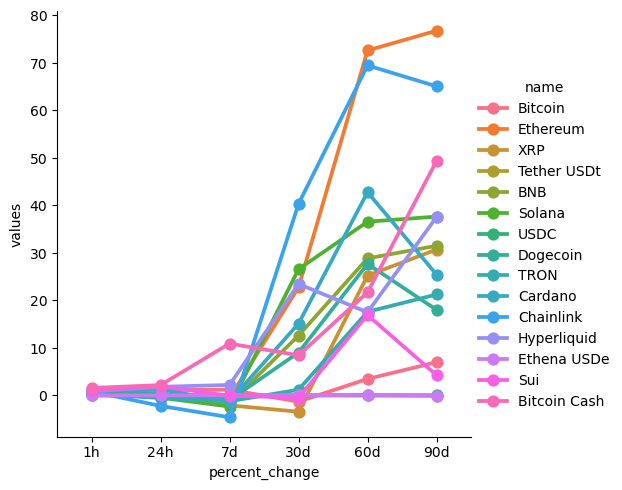

In [54]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [65]:
df8 = df[['name','quote.USD.price','timestamp']]
df8

,name,quote.USD.price,timestamp
0,Bitcoin,111473.29,2025-09-03 10:24:05.972422
1,Ethereum,4436.86,2025-09-03 10:24:05.972422
2,XRP,2.86,2025-09-03 10:24:05.972422
3,Tether USDt,1.00,2025-09-03 10:24:05.972422
4,BNB,857.90,2025-09-03 10:24:05.972422
5,Solana,210.92,2025-09-03 10:24:05.972422
6,USDC,1.00,2025-09-03 10:24:05.972422
7,Dogecoin,0.22,2025-09-03 10:24:05.972422
8,TRON,0.34,2025-09-03 10:24:05.972422
9,Cardano,0.84,2025-09-03 10:24:05.972422


In [66]:
df9 = df8.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,111473.29,2025-09-03 10:24:05.972422
0,Bitcoin,111631.96,2025-09-04 19:10:22.955058
0,Bitcoin,111572.88,2025-09-04 19:11:23.173787
0,Bitcoin,111430.96,2025-09-04 19:12:23.364005
0,Bitcoin,111384.66,2025-09-04 19:13:25.105448
0,Bitcoin,111439.54,2025-09-04 22:53:03.097128
0,Bitcoin,111446.47,2025-09-04 22:54:03.266619
0,Bitcoin,111478.22,2025-09-04 22:55:04.653660
0,Bitcoin,111468.12,2025-09-04 22:56:07.725125
0,Bitcoin,111431.96,2025-09-04 22:57:07.987135


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

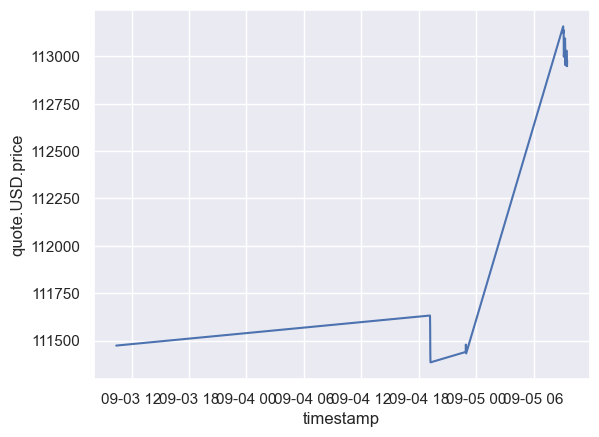

In [67]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df9)